# Numpy Package

In [54]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
import seaborn as sns
from scipy import stats

# magic command
%matplotlib inline
#set figure size
plt.rcParams['figure.figsize'] = [10, 5]

# 1. Overall purpose of numpy.random package

The purpose of the numpy.random package is to generate pseudorandom numbers. This is acheived by passing arguments to numpy that determine the shape and size of the random array. These parameters allow numpy to generate seemingly random numbers with a deterministic input. The overall shape and output of the numpy.random package can be determined by the use of in-built functions which will be explored further in this assignment.

# 2. Simple Random Data and Permutation functions

## Simple Random Data

On the numpy.random documentation the simple random data section contains a set of functions that return random samples primarily in the uniform distribution. 

The uniform distribution will be explained in the following examples, along with the other types of distributions used here.

## numpy.random.rand
[numpy.random.rand](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html#numpy.random.rand) returns random values in a given shape (d0, 1, ..., dn). The parameters provided to the function determine the number of samples in the array, as well as the number of arrays. If no parameters are provided then the function returns a single random sample. The samples are returned in a uniform distribution in the half open interval [0.0, 1.0).

In the uniform distribution, the random samples are equally likely to appear at each interval.

## numpy.random.randn
[nump.random.randn](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randn.html#numpy.random.randn) is similar to the previous function insofar as the parameters are the same. However, the function returns the samples in the standard normal distribution.

The standard normal distribution has a centre of 0 with a higher density of samples around the centre with the density of samples reducing the further they fall from the centre.

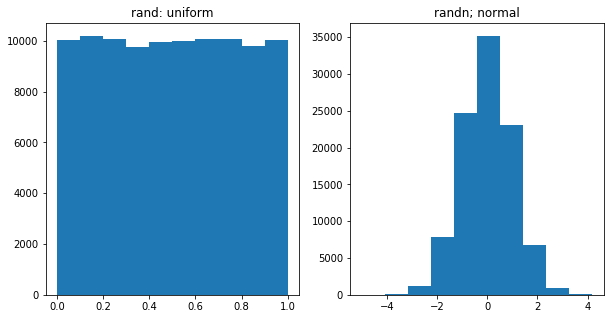

In [16]:
# rand and randn functions with same sample size
uniform = np.random.rand(100000)
normal = np.random.randn(100000)

# histogram of rand function
plt.subplot(1, 2, 1)
plt.hist(uniform)
plt.title('rand: uniform')
plt.show

# histogram of randn function
plt.subplot(1, 2, 2)
plt.hist(normal)
plt.title('randn; normal')
plt.show()

### numpy.random.randint
[numpy.random.randint](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint) returns samples of integers in the uniform distribution. Samples are drawn in the half open interval, a lower integer which is included, and a higher integer, which is excluded.

A real world example of this function can be seen in the visualisation of dice rolls over a given sample size. If a regular six sided die was rolled 100,000 times the distribution of each number rolled is almost equal across all probabilities.

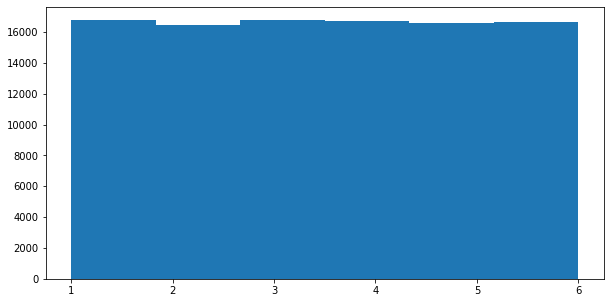

In [6]:
# low integer of 1, higher integer of 7, 100000 samples
d6 = np.random.randint(1, 7, 100000, dtype=int)
# histogram of distribution
plt.hist(d6, 6)
plt.show()


The expected distribution for each result is 0.16667. As you can see below, the distribution of each generated result, falls in and around the expected result.

In [60]:
(d6 == 1).sum()/100000

0.16764

In [9]:
(d6 == 2).sum()/100000

0.16482

In [10]:
(d6 == 3).sum()/100000

0.16785

In [11]:
(d6 == 4).sum()/100000

0.1673

In [12]:
(d6 == 5).sum()/100000

0.16605

In [55]:
(d6 == 6).sum()/100000

0.16634

### numpy.random.bytes
[numpy.random.bytes](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.bytes.html#numpy.random.bytes) returns random bytes in a given size

A byte is a unit of digital information consisting of 8 bits.

In [4]:
# generate 10 random bytes 
np.random.bytes(10)

b'\xc0\xaa5N\xbb\xf9\xeb\x94\x19\xd5'

## Permutations

Permutations arrange or rearrange the sequence of an array. 

### Shuffle

[Shuffle](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.shuffle.html#numpy.random.shuffle) changes the order of an already known sequence by rearranging it's contents. A common example of this is seen in a music player's shuffle function.

Music albums come with a set playing order. On a twelve track album we can assign the array ([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]).

In [5]:
# array of 12 numbers
arr = np.arange(12)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

If the shuffle function is called the sequence of tracks is rearranged.

In [6]:
# shuffle the array
np.random.shuffle(arr)

In [7]:
#shuffled output
arr

array([11,  3,  9,  1,  6, 10,  0,  7,  5,  4,  8,  2])

To demonstrate this further in the context of a music player, we can take Lewis Capldi's debut album _Divinely Uninspired to a Hellish Extent_.

In [18]:
# created an array containing the track titles in the original order
lp = (['Grace', 'Bruises', 'Hold Me While You Wait', 'Someone You Loved', 'Maybe', 'Forever', 'One', 'Dont Get Me Wrong', 'Hollywood', 'Lost on You', 'Fade', 'Headspace',])
lp

['Grace',
 'Bruises',
 'Hold Me While You Wait',
 'Someone You Loved',
 'Maybe',
 'Forever',
 'One',
 'Dont Get Me Wrong',
 'Hollywood',
 'Lost on You',
 'Fade',
 'Headspace']

In [19]:
# shuffled the playing order of the album
np.random.shuffle(lp)
lp

['Headspace',
 'Someone You Loved',
 'Hollywood',
 'Grace',
 'Lost on You',
 'Dont Get Me Wrong',
 'Bruises',
 'Hold Me While You Wait',
 'Forever',
 'Maybe',
 'Fade',
 'One']

### Permutation
[Permutation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.permutation.html#numpy.random.permutation) outputs a randomly ordered array in a given size.

In [10]:
# random permutation with the size of 10
np.random.permutation(10)

array([3, 8, 5, 6, 0, 2, 9, 1, 4, 7])

In [3]:
# random permution in the shape 2 arrays with a length of 5
arr_2 = np.arange(10).reshape((2, 5))
np.random.permutation(arr_2)

array([[5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4]])

# 3. Distributions

## Geometric Distribution
The [Geometric Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.geometric.html#numpy.random.geometric) models the number of trials that must be run in order to provide a successful result.

A [Bernoulli Trial](https://en.wikipedia.org/wiki/Bernoulli_trial) is a random experiment where the results are either a success or a failure. Essentially, a Bernoulli Trial deals with "yes" or "no" questions. A straight forward example of this is a coin flip where the results can either be heads or tails. 



In [12]:
# 100000 coin flips with a probability rate of 50%
heads = np.random.geometric(p=0.5, size=100000)
(heads == 1).sum()/100000.

0.49828

# Poisson  Distribution
The [Poison Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.poisson.html#numpy.random.poisson) describes the probability of a given number of events occuring in a fixed interval. These events occur at a constant rate and independently of the previous event. That is to say the occurrence of a single event does not predict the probility of a future event.

A practical example of this can be seen in generating some random data that mimics the number of incoming calls at a call centre in a set time period. [Pandas time series/ date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) was used to create a time series that specified business hours only (09:00 to 17:00). This time series was then used as the index for samples randomly generated by the Poisson distribution.


In [13]:
# set business hours 
bh = pd.offsets.BusinessHour()
# date range for two work days 
rng = pd.date_range('10/07/2019', periods=16, freq=bh)
# simulated data for number of inbound calls in work week
# average number of events is 100 per period of time 
ts = pd.DataFrame(np.random.poisson(100, len(rng)), index=rng, columns=['Inbound Calls'])
ts

,Inbound Calls
2019-10-07 09:00:00,111
2019-10-07 10:00:00,107
2019-10-07 11:00:00,107
2019-10-07 12:00:00,87
2019-10-07 13:00:00,96
2019-10-07 14:00:00,106
2019-10-07 15:00:00,111
2019-10-07 16:00:00,93
2019-10-08 09:00:00,108
2019-10-08 10:00:00,91


With random call data generated with the Poisson distribution the dataframe can be visualised with a lineplot.

/Users/adamnihill/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


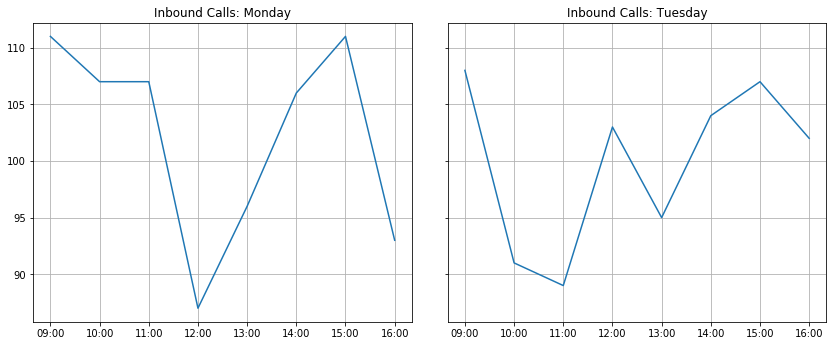

In [14]:
# sliced data frame in sections for monday and tuesday 
mon = ts.loc['2019-10-07 09:00:00':'2019-10-07 16:00:00']
tue = ts.loc['2019-10-08 09:00:00':'2019-10-08 16:00:00']

# created subplots sharing same y-axis
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12, 5))
fig.tight_layout(pad=2)

# plot of mondays calls 
ax1.plot(mon)
ax1.grid()
ax1.set_title('Inbound Calls: Monday')
#set  x-axis date format to just include hours and minutes 
ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

# plot of tuesdays calls 
ax2.plot(tue)
ax2.grid()
ax2.set_title('Inbound Calls: Tuesday')
ax2.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

plt.show()

## Triangular Distribution
The [Triangular Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.triangular.html#numpy.random.triangular) is useful as a means of prediction when limited information is known. There are three parameters of the triangular distribution, the best-case estimate, the worst case estimate and the most likely estimate.

There are three parameters to the triangular distribution, a lower limit(a) an upper limit(b), the mode(c), and the size of the output, where a ≤ c ≤ b.

The following example details the expected sales of a company over the course of a month where the minimum expected sales is to the value of €1000, the maximum expected sales is €6000, and the realistic value of expected sales is €3000. 

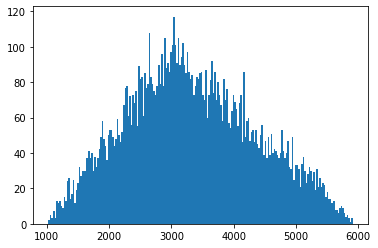

In [15]:
# Triangualr distribution where a=1000, b=6000, c=3000, with size of 10000
plt.hist(np.random.triangular(1000, 3000, 6000, 10000), bins=200)
plt.show()

## Standard_t Distribution
The [Standard_t Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.standard_t.html#numpy.random.standard_t) draws samples from a standard Student's t distribution.

[Student's t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) 
<blockquote>The student's t distribution arises when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown.</blockquote>

The data for how many kilometres each team in the Premier League ran for the 2018/19 season was collected. Taking 3475 kilometres as the recommended distance each team should cover over the course of the season a student's t-test can be applied.

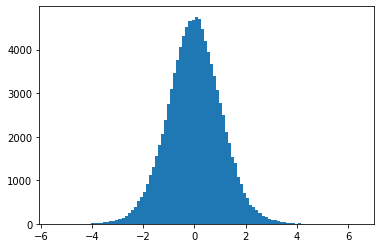

In [16]:
# array of km run by premier league teams for 2018/19 season
km = np.array([3134, 3176, 3240, 3308, 3326, 3329, 3332, 3359, 3363, 3389, 3402, 3411, 3428, 3451, 3466, 3491, 3509, 3523, 3532, 3539])

# 20 samples in array so 19 degrees of freedom
s = np.random.standard_t(19, size=100000)

plt.hist(s, bins=100)
plt.show()

In [17]:
# set target for km run by team to 3475km
t = (np.mean(km)-3475)/(km.std(ddof=1)/np.sqrt(len(km)))

In [18]:
# The result indicates null hypothesis has about 99% probability of being accurate 
np.sum(s<t)/float(len(s))

0.00128

## Hypergeometric Distribution
The [Hypergeometric Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.hypergeometric.html#numpy.random.hypergeometric) can be applied to a hand of Texas Hold'em poker. The distribution requires three main parameters, the number of successful selections, the number of unsuccessful selections, and the number of draws made. The final parameter is the size of the output.

Assume that the player has one heart card in their hand and two out of the three cards drawn for the first round are also hearts. The 
hypergeomtric distribution can be used to predict the probability that (a) one of the next two cards drawn will be hearts, (b) that both of the next two cards will be hearts, and (c) that neither of the next two cards drawn will be hearts. In this case, it is known that 10 hearts remain in the deck as 3 have already been drawn, and 37 non-hearts remain as 2 have already been drawn. 

In [20]:
# set ngood, nbad, and nsample values 
ngood, nbad, nsamp = 10, 37, 2
#passed values to the hypergeometric distribution
s = np.random.hypergeometric(ngood, nbad, nsamp, 100000)

# probability of 1 card being a heart
np.sum(s==1)/100000


0.3431

In [20]:
# probability of both cards being hearts
np.sum(s>1)/100000

0.0419

In [21]:
# probability of neither cards being hearts
np.sum(s<1)/100000

0.61735

To take this example further, assume that the 3 hearts that are known form part of a straight flush, consequetive cards of the same suit. Now, what are the chances of (a) one of the next two cards drawn being part of the required sequence, (b) both cards drawn being part of the required sequence, and (c) neither card drawn being part of the required sequence.

For the purpose of simplification we will assume that cards already drawn are the ace, 2, and 3 of hearts. This means that there are only two possible successful selections, the 4, and 5 of hearts. 

In [22]:
# set ngood, nbad, and nsample values 
sf = np.random.hypergeometric(2, 45, 2, 100000)
# probability of either 5 or 6 of hearts being drawn
np.sum(sf==1)/100000

0.08416

In [23]:
# probability of both cards being drawn
np.sum(sf>1)/100000

0.00079

In [24]:
# probability of neither cards bein drawn
np.sum(sf<1)/100000

0.91505

# 4. Seeds
A seed is a number used to initialise a pseudorandom number generator. The seed does not need to be random. As long as the seed, itself, is ignored, the rest of the generated values will follow a given probability distribution. 

The seed is the starting position in an array, such the array contained in the Mersenne Twister pseudorandom number generator, with the random samples following sequencially from the seed. Setting a seed allows for reproducible results as it will always begin with the same starting position.

To explain this in concise terms, consider the decimal expansion of pi. This decimal expanision is infinite and does not repeat patterns. Take the first 20 digits of the expansion.

<blockquote>1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6</blockquote>

Now let's say that the digit in the 4th position(iterating from 0) is chosen as the seed.

<blockquote>1, 4, 1, 5, <b>9</b>, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6</blockquote>

In this case the seed is 9 and the first randomly generated number will be 2 followed by 6, 5, 3, 8, etc.

## numpy.random.RandomState
The [numpy.random.RandomState](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState) generator is a container for the Mersenne Twister pseudo-random number generator. An int or an array can be provided to the generator to act as a seed. 

The [Mersenne Twister](https://docs.scipy.org/doc/numpy/reference/random/bit_generators/mt19937.html) contains a 624-element array of unsigned integers and a single integer between 0 and 624 that indexes the current position in that array.

In [10]:
# initialised the generator with a seed of 9
rng = np.random.RandomState(9)

In [11]:
# generated a random array in poisson distribution
rng.poisson(100, 9)

array([100,  88,  98,  83,  89, 123, 106, 115, 101])